<a href="https://colab.research.google.com/github/Moshikaa/Linear-Regression-using-one-variable/blob/main/LR1_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Download data
medical_charges_url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'insurance.csv')

('insurance.csv', <http.client.HTTPMessage at 0x790a7606d8d0>)

In [3]:
#Creating pandas dataframe from downloaded file
!pip install pandas --quiet
import pandas as pd
insurance_df=pd.read_csv('insurance.csv')

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#commit
!pip install jovian --quiet
import jovian
jovian.commit()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 681.0 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [8]:
#Data Vizualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#The following settings will improve the default style and font sizes for our charts.
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [10]:
#Age
insurance_df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [11]:
fig1=px.histogram(insurance_df, x='age', marginal='box', nbins=47, title='Distribution of Age')
fig1.update_layout(bargap=0.1)
fig1.show()

In [12]:
#BMI
insurance_df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [13]:
fig2=px.histogram(insurance_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI (Body Mass Index)')
fig2.update_layout(bargap=0.1)
fig2.show()

In [17]:
#Charges
fig3 = px.histogram(insurance_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')  # here if smoker yes, green, if not then grey
fig3.update_layout(bargap=0.1)
fig3.show()

In [18]:
#Smoking Habits
counts=insurance_df.smoker.value_counts()

In [19]:
fig4=px.histogram(insurance_df, x='smoker', color='sex', title='Smoking habit')
fig4.show()

In [20]:
fig5 = px.pie(names=['True', 'False'], values=counts, title='Boolean Dataset Distribution')
fig5.show()

In [21]:
#Relationship between BMI and Charges
fig6 = px.scatter(insurance_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'], #to control what information is displayed when interacting with the plot.
                 title='BMI vs. Charges')
fig6.update_traces(marker_size=5) #You can customize various trace properties, such as colors, markers, line styles, and more using update_traces
fig6.show()

In [22]:
#Correlation - only valid for numeric values

As you can tell from the analysis, the values in some columns are more closely related to the values in "charges" compared to other columns. E.g. "age" and "charges" seem to grow together, whereas "bmi" and "charges" don't.

In [23]:
insurance_df.corr()

<ipython-input-23-a2eb4c6ec7ce>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [24]:
insurance_df.charges.corr(insurance_df.age)

0.2990081933306476

In [25]:
insurance_df.charges.corr(insurance_df.bmi)

0.19834096883362895

<ipython-input-26-59b7a54b218a>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



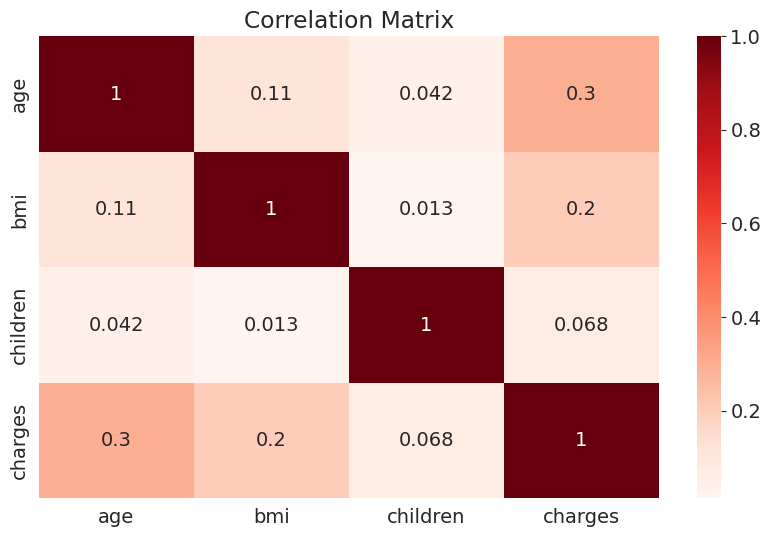

In [26]:
#Heatmap
sns.heatmap(insurance_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [27]:
#Corr is applicable only to numerical. Hence we convert the other categorical to numerical.

In [28]:
#For Boolean Categorical
varlist=['smoker']
def binary_map(x):
  return x.map({'yes':1,'no':0})
insurance_df[varlist]=insurance_df[varlist].apply(binary_map)

In [29]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [30]:
#Dummy variable
gender=pd.get_dummies(insurance_df['sex'])
gender.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
regions=pd.get_dummies(insurance_df['region'])
regions.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [32]:
insurance_df.head() #Nothing changes in main dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


In [33]:
insurance_df=pd.concat([insurance_df,gender,regions], axis=1) #You can join all the dummy columns in a single line of code
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest
0,19,female,27.900,0,1,southwest,16884.92400,1,0,0,0,0,1
1,18,male,33.770,1,0,southeast,1725.55230,0,1,0,0,1,0
2,28,male,33.000,3,0,southeast,4449.46200,0,1,0,0,1,0
3,33,male,22.705,0,0,northwest,21984.47061,0,1,0,1,0,0
4,32,male,28.880,0,0,northwest,3866.85520,0,1,0,1,0,0


In [38]:
insurance_df.corr() #in the op we can note that the corr for charges is more with 'age' and 'smoker'

<ipython-input-38-a2eb4c6ec7ce>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,bmi,children,smoker,charges,female,male,northeast,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,-0.025019,0.299008,0.020856,-0.020856,0.002475,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.003750,0.198341,-0.046371,0.046371,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.007673,0.067998,-0.017163,0.017163,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.003750,0.007673,1.000000,0.787251,-0.076185,0.076185,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.198341,0.067998,0.787251,1.000000,-0.057292,0.057292,0.006349,-0.039905,0.073982,-0.043210
female,0.020856,-0.046371,-0.017163,-0.076185,-0.057292,1.000000,-1.000000,0.002425,0.011156,-0.017117,0.004184
male,-0.020856,0.046371,0.017163,0.076185,0.057292,-1.000000,1.000000,-0.002425,-0.011156,0.017117,-0.004184
northeast,0.002475,-0.138156,-0.022808,0.002811,0.006349,0.002425,-0.002425,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.135996,0.024806,-0.036945,-0.039905,0.011156,-0.011156,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.068498,0.073982,-0.017117,0.017117,-0.345561,-0.346265,1.000000,-0.346265


In [37]:
#Linear Regression using single feature
#create a dataframe only consisting of non smokers
non_smoker_df=insurance_df[insurance_df.smoker == 0]
non_smoker_df

,age,sex,bmi,children,smoker,region,charges,female,male,northeast,northwest,southeast,southwest
1,18,male,33.770,1,0,southeast,1725.55230,0,1,0,0,1,0
2,28,male,33.000,3,0,southeast,4449.46200,0,1,0,0,1,0
3,33,male,22.705,0,0,northwest,21984.47061,0,1,0,1,0,0
4,32,male,28.880,0,0,northwest,3866.85520,0,1,0,1,0,0
5,31,female,25.740,0,0,southeast,3756.62160,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,female,44.700,3,0,southwest,11411.68500,1,0,0,0,0,1
1333,50,male,30.970,3,0,northwest,10600.54830,0,1,0,1,0,0
1334,18,female,31.920,0,0,northeast,2205.98080,1,0,1,0,0,0
1335,18,female,36.850,0,0,southeast,1629.83350,1,0,0,0,1,0


<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

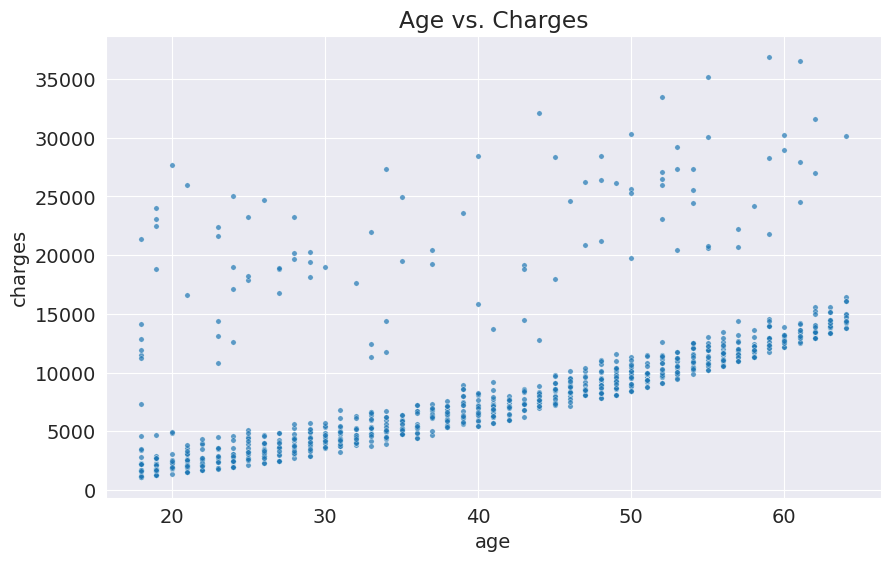

In [39]:
#We know that age and smoker has maximum corr with charges.
#so we find the relationship between age and charges
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15)

In [70]:
#There is almost a line like structure formed. We'll try to fit it in the formula of line,
# y=mx+b
# y=charges, x=age
# thus charges=m*age + b
# here, m and b are parameters or weights of the model

#We create a estimate_charges function for given age, m and b
def estimate_charges(age, m, b):
  return m*age+b
#This function itself can be called a model

In [41]:
#Lets guess the value for m and b
m=50
b=100

Text(0, 0.5, 'Estimated Charges')

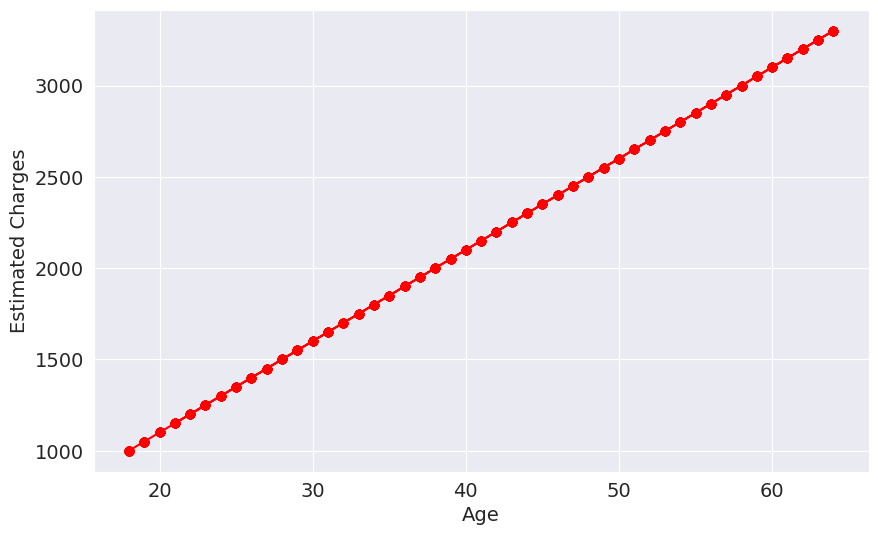

In [44]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, m, b)
plt.plot(ages, estimated_charges, 'r-o')  #r meand red and o means circle marker
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

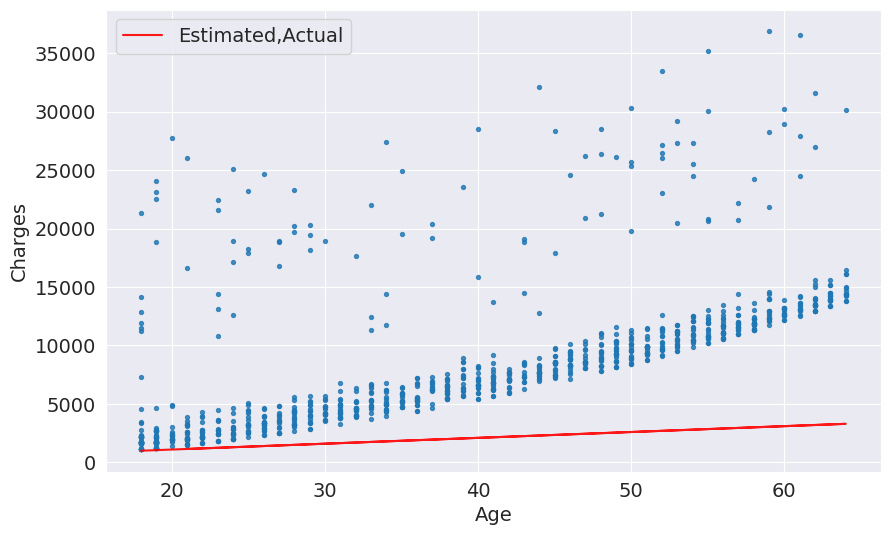

In [49]:
target=non_smoker_df.charges

plt.plot(ages,estimated_charges,'r', alpha=0.9)
plt.scatter(x=ages, y=target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimated,' 'Actual'])
plt.show()

In [52]:
#We can see that the model is not fir. Hence we need to keep trying diff values of m and b for the model to fit.
#So lets create a function for trial and error itslef called try_parameter
def try_parameter(m,b):

  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, m, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9)
  plt.scatter(ages, target, s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual'])
  return(plt.show())

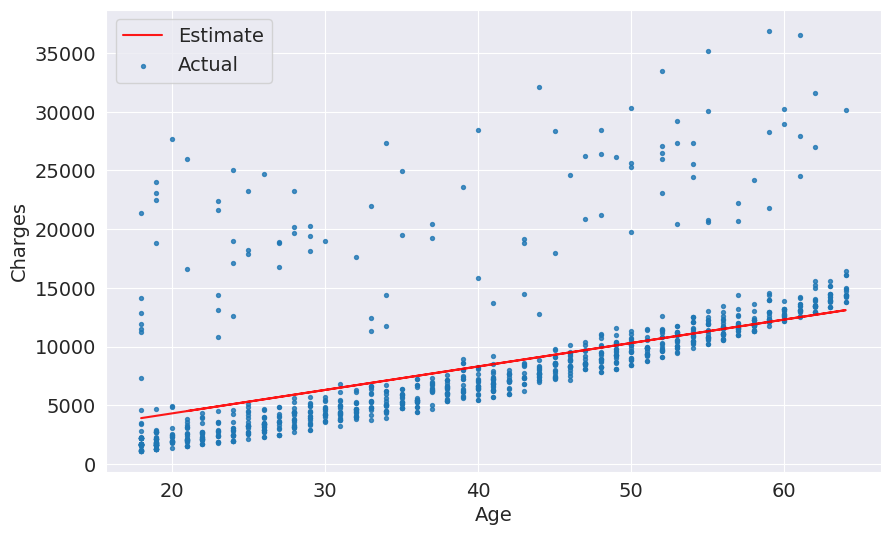

In [53]:
try_parameter(200,300)

In [61]:
#Loss/Cost function - used to compare model's predn with actual target
# Residual = Predicted - Actual value
# then square this, get mean, put root. This is called RMSE
# RMSE= Root Mean Squared Error
import numpy as np
def rmse(targets, predictions):
  return(np.sqrt(np.mean(np.square(targets-predicted))))


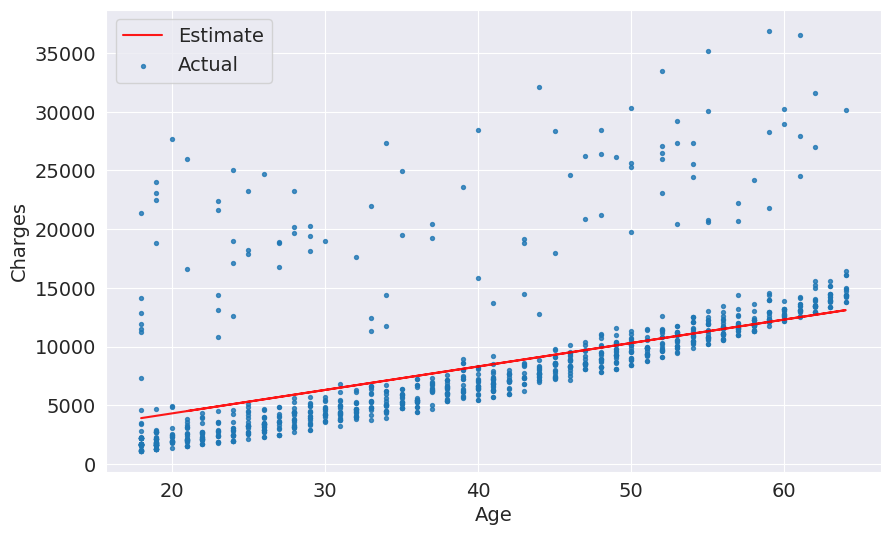

4764.583530911869

In [79]:
m=200
b=300
try_parameter(m,b)
targets=non_smoker_df.charges
predicted=estimate_charges(non_smoker_df.age, m, b)
rmse(targets, predicted)

In [80]:
#Which means,On average, each element in the prediction differs from the actual target by 4764.59

In [82]:
#Always build try_parameter model with loss function
def try_parameter(m, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, m, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4764.583530911869


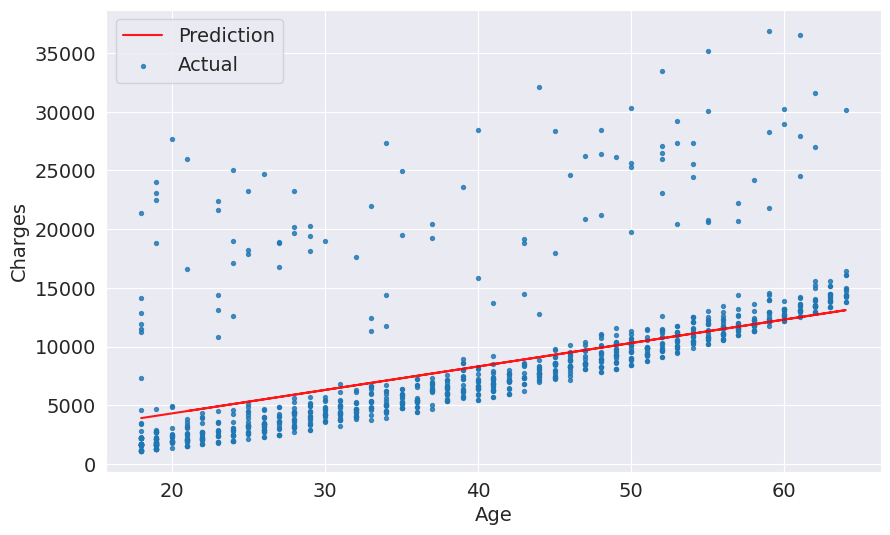

In [83]:
try_parameter(200,300)

In [ ]:
#Optimization
# Least square method - smaller dataset
# Gradient descent optimization - larger dataset

In [84]:
#This can be done through Scikit-learn
!pip install scikit-learn --quiet

In [85]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [86]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [87]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
print("inputs.shape = ", inputs.shape)
print("targets.shape = ", targets.shape)

inputs.shape =  (1064, 1)
targets.shape =  (1064,)


In [88]:
#Fitting the model
model.fit(inputs, targets)

LinearRegression()

In [89]:
help(model.predict) #Predicts op values for age

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array-like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



In [90]:
model.predict([[23],
               [37],
               [61]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [ ]:
#model.coef_ and model.intercept_ helps give m and b values

In [91]:
model.coef_

array([267.24891283])

In [93]:
model.intercept_

-2091.4205565650864

RMSE Loss:  4764.583530911869


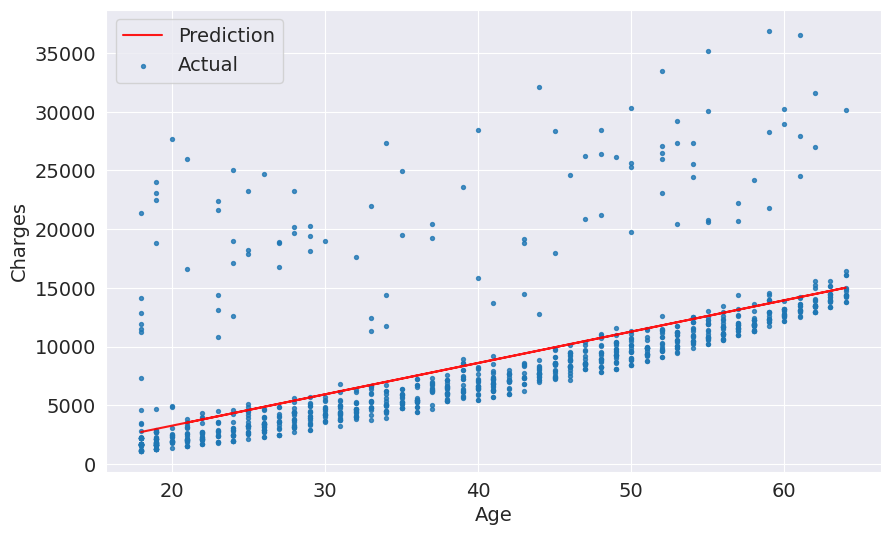

In [95]:
try_parameter( 267.24, -2091.402) #Best fit line is as shown

In [ ]:
#So our model is best fit for the given model.coef_ i.e 'm' or slope and model.intercept_ i.e 'b' or intercept

In [ ]:
#Similarly LinearRegression with multiple features can be done where y=m1*x1+m2*x2+b is the formula